In [1]:
# importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns  
import numpy as np 
from matplotlib import pyplot as plt   

THE Nan VALUES OF THE BG COLUMN ARE FILLED WITH THE RESPECTIVE DAY'S MEAN_BG

In [2]:
# reading the input file
df = pd.read_csv("C:\\Users\\vvsat\\Documents\\machine learning\\blood glucose challenge\\dataset_0.csv")
print(df.head())  

    TIME  FOOD  RAPI  LAI  BG
0  00:00   NaN   NaN  NaN NaN
1  00:10   NaN   NaN  NaN NaN
2  00:20   NaN   NaN  NaN NaN
3  00:30   NaN   NaN  NaN NaN
4  00:40   NaN   NaN  NaN NaN


In [3]:
# dropping the 'TIME' column
df = df.drop("TIME", axis=1)

# dropping the rows where the predictor is Nan
df = df.dropna(subset=['BG'])

In [4]:
len(df)

614

# VISUALISING THE DATA

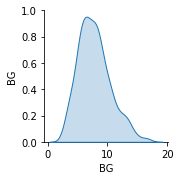

In [5]:
# plotting the gaussian distribution of the data

sns.pairplot(df[['BG']], diag_kind='kde')

In [6]:
# printing the head of the final dataframe
print(df.head())

     FOOD  RAPI  LAI   BG
95    0.0   0.0  0.0  8.3
136   0.0   0.0  0.0  5.8
195   0.0   0.0  0.0  4.9
218   0.0   0.0  0.0  8.6
344   0.0   0.0  0.0  7.5


VISUALISING THE INDEPENDENT RELATIONSHIPS


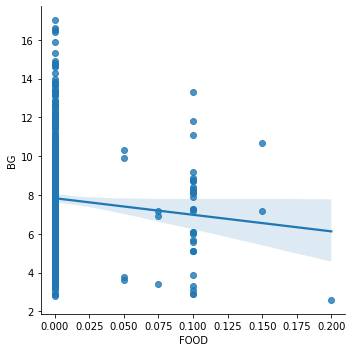

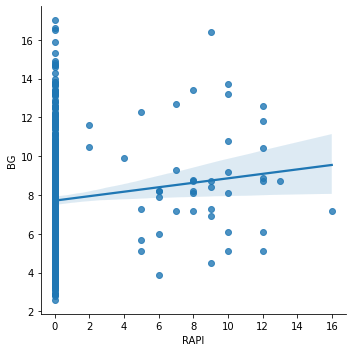

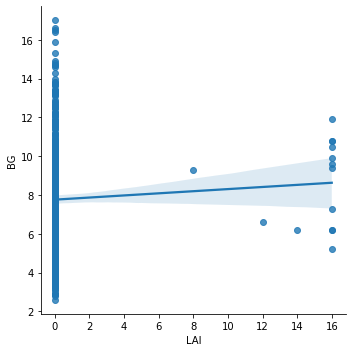

In [7]:
# plotting the data
print("VISUALISING THE INDEPENDENT RELATIONSHIPS")

sns.lmplot(x='FOOD', y='BG', data=df)

sns.lmplot(x='RAPI', y='BG', data=df)  

sns.lmplot(x='LAI', y='BG', data=df)  

          FOOD      RAPI       LAI        BG
FOOD  1.000000  0.553667 -0.039014 -0.080194
RAPI  0.553667  1.000000 -0.011430  0.097594
LAI  -0.039014 -0.011430  1.000000  0.045606
BG   -0.080194  0.097594  0.045606  1.000000


<AxesSubplot:>

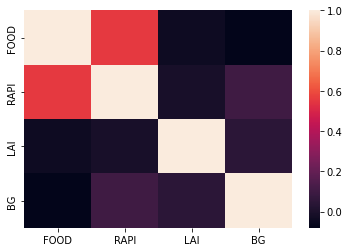

In [8]:
# displaying the correlation between the given features
corr = df.corr()
print(corr)
sns.heatmap(corr,  
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [9]:
# understanding the skewness and kurtosis of the data
print("SKEWNESS : \n",df.skew(axis = 0, skipna = True))
print("\n \n KURTOSIS : \n",df.kurtosis(axis = 0, skipna = True))

SKEWNESS : 
 FOOD    3.951434
RAPI    3.995057
LAI     6.579114
BG      0.651681
dtype: float64

 
 KURTOSIS : 
 FOOD    15.554181
RAPI    15.432106
LAI     41.825665
BG       0.254234
dtype: float64


In [10]:
# applying logrithmic transform for BG
# applied only to the targets

print("after reciprocal transform")
df['BG'] = np.reciprocal(df['BG'])
print("SKEWNESS : \n",df.skew(axis = 0, skipna = True)) 

after reciprocal transform
SKEWNESS : 
 FOOD    3.951434
RAPI    3.995057
LAI     6.579114
BG      1.268593
dtype: float64


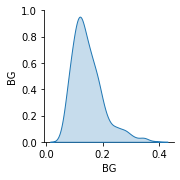

In [11]:
# plotting the distribution of the data after reciprocal transform
sns.pairplot(df[['BG']], diag_kind='kde')

In [12]:
print(df.head())

     FOOD  RAPI  LAI        BG
95    0.0   0.0  0.0  0.120482
136   0.0   0.0  0.0  0.172414
195   0.0   0.0  0.0  0.204082
218   0.0   0.0  0.0  0.116279
344   0.0   0.0  0.0  0.133333


In [13]:
# food, rapi and lai - independent variables
x_df = df[['FOOD', 'RAPI', 'LAI']]

# BG - dependent/predictor variable 
y_df = df['BG'] 

x_df = x_df.to_numpy()
y_df = y_df.to_numpy()

In [14]:
# splitting the data into train and test(20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

In [15]:
from sklearn.compose import make_column_selector

# numerical column selector
num_selector = make_column_selector(dtype_include=np.number)  

print('numerical columns = ', num_selector(df)) 

numerical columns =  ['FOOD', 'RAPI', 'LAI', 'BG']


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# preprocessing steps - Scaling and Imputing the NaN values
num_linear_processor = make_pipeline(
    SimpleImputer(strategy='constant', add_indicator=True), StandardScaler()
)

num_linear_processor 

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(add_indicator=True, strategy='constant')),
                ('standardscaler', StandardScaler())])

# LINEAR REGRESSOR

In [17]:
# lasso regressor
from sklearn.linear_model import LinearRegression

lrg_pipeline = make_pipeline(num_linear_processor, LinearRegression(fit_intercept=True, normalize='deprecated'))
lrg_pipeline 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [18]:
# fitting the model
lrg_pipeline.fit(X_train,y_train)
print('R^2 value =', lrg_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = lrg_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2)

R^2 value = 0.07657246211313207
Mean square error = 7.282293375157323e-08


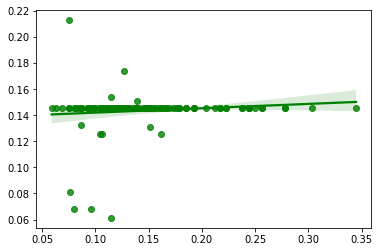

In [19]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# LASSO REGRESSOR

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# defining the lasso model
lasso = LassoCV(random_state=None,  
                alphas = None, 
                max_iter=100, 
                fit_intercept=True, 
                normalize='deprecated')

lasso_pipeline = make_pipeline(num_linear_processor, lasso)
lasso_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('lassocv', LassoCV(max_iter=100))])

In [21]:
# fitting the model
lasso_pipeline.fit(X_train,y_train)
print('R^2 value =', lasso_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = lasso_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2) 

R^2 value = 0.07622028952252802
Mean square error = 5.518187994832656e-09


In [22]:
# save the model to disk
import pickle 

filename = 'lasso_cv.pkl'
pickle.dump(lasso_pipeline, open(filename, 'wb'))

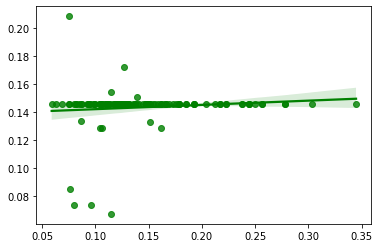

In [23]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# RIDGE REGRESSOR

In [24]:
from sklearn.linear_model import RidgeCV

ridge_pipeline = make_pipeline(num_linear_processor, RidgeCV(alphas=(0.001, 0.1, 1.0),
                                                             fit_intercept=True, 
                                                             normalize='deprecated'))
ridge_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('ridgecv', RidgeCV(alphas=array([0.001, 0.1  , 1.   ])))])

In [25]:
# fitting the model
ridge_pipeline.fit(X_train,y_train)
print('R^2 value =', ridge_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = ridge_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2)

R^2 value = 0.07657070010823708
Mean square error = 6.58970636195297e-08


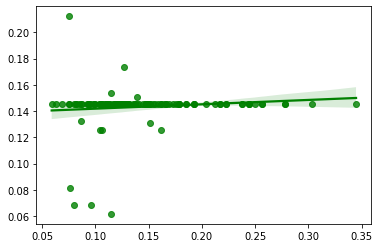

In [26]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# POLYNOMIAL REGRESSION

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Histogram-based Gradient Boosting Regression Tree
poly_pipeline = make_pipeline(
    num_linear_processor, PolynomialFeatures(5), Ridge(alpha=1e-3)
)
poly_pipeline 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('ridge', Ridge(alpha=0.001))])

In [28]:
# fitting the model
poly_pipeline.fit(X_train,y_train)
print('R^2 value =', poly_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = poly_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2) 

R^2 value = 0.11433443232858187
Mean square error = 1.511983755284994e-06


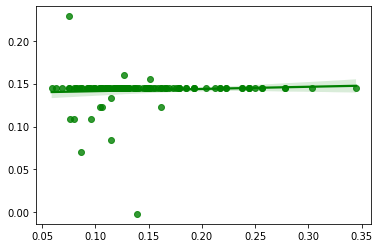

In [29]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# HISTOGRAM GRADIENT BOOSTING REGRESSOR

In [30]:
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.linear_model import RidgeCV

gbdt_pipeline = make_pipeline(num_linear_processor, 
                              HistGradientBoostingRegressor(loss='squared_error',
                                                            max_iter=100,
                                                            random_state=0))
gbdt_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=0))])

In [31]:
# fitting the model
gbdt_pipeline.fit(X_train,y_train)
print('R^2 value =', gbdt_pipeline.score(X_train,y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = gbdt_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2)

R^2 value = 0.07746113049360448
Mean square error = 3.3562602127751384e-07


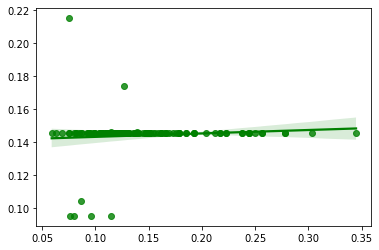

In [32]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# SGD REGRESSOR

In [33]:
from sklearn.linear_model import SGDRegressor

# Histogram-based Gradient Boosting Regression Tree
sgd_pipeline = make_pipeline(
    num_linear_processor, SGDRegressor(loss='squared_error',
                                       penalty='l2', 
                                       eta0=0.01,
                                       alpha=0.0001,
                                       fit_intercept=True,
                                       learning_rate = 'adaptive'
                                      )
)
sgd_pipeline  

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('sgdregressor', SGDRegressor(learning_rate='adaptive'))])

In [34]:
# fitting the model

sgd_pipeline.fit(X_train,y_train)
print('R^2 value =', sgd_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = sgd_pipeline.predict(X_test)    
print("Mean square error =", np.mean(prediction_test-y_test)**2)

R^2 value = 0.07644697980023296
Mean square error = 1.0998795763799678e-07


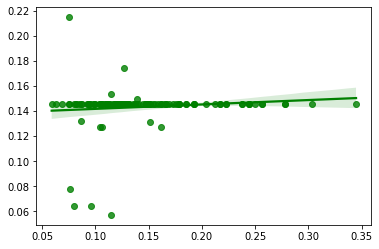

In [35]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

# ENSEMBLE

In [36]:
from sklearn.ensemble import StackingRegressor

estimator_1 = [
    ("Linear Regression", lrg_pipeline),
    ("Gradient Boosting", gbdt_pipeline), 
    ("Lasso Regression", lasso_pipeline),
    ("ridge Regression", ridge_pipeline) 
]

stacking_regressor_1 = StackingRegressor(estimators=estimator_1, final_estimator = sgd_pipeline)
stacking_regressor_1 

StackingRegressor(estimators=[('Linear Regression',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('simpleimputer',
                                                                 SimpleImputer(add_indicator=True,
                                                                               strategy='constant')),
                                                                ('standardscaler',
                                                                 StandardScaler())])),
                                               ('linearregression',
                                                LinearRegression())])),
                              ('Gradient Boosting',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('simpleimputer',
                                                                 SimpleImputer(add_ind...
           

In [37]:
# fitting the estimators
stacking_regressor_1.fit(X_train,y_train)

# testing the model 
prediction_test = stacking_regressor_1.predict(X_test)    

print('R^2 value =', stacking_regressor_1.score(X_train, y_train))  #Printing the R^2 value    
print("Mean square error =", np.mean(prediction_test-y_test)**2)

R^2 value = 0.0746439986238222
Mean square error = 5.230234074075753e-08


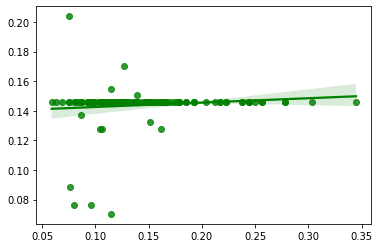

In [38]:
# plotting the results
sns.regplot(x=y_test, y = prediction_test,color="g");  

##### 